<a href="https://colab.research.google.com/github/gsc16/MachineLearning/blob/master/hw2/hw2_arch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Architecture 2

I have modified Architecture 1 by increasing the learning rate to 0.0005. I have also used only 2 Maxpool layers(One after 2 convolutional layers and the other after the third convolutional layer). Now, I could achieve a maximum validation accuarcy of 74.28%. Though the accuracy has increased compared to first architecture, it is still overfitting(It is less compared to first architecture). For the same architecture, with a learning rate of 0.001, I could achieve a maximum vlaidation accuracy of 73.71%.

### Imports

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


### Loading data

In [2]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

170500096/170498071 [==============================] - 22s 0us/step


In [3]:
train_images_original.shape, train_labels_original.shape,test_images_original.shape, test_labels_original.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

### Displaying some images

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)

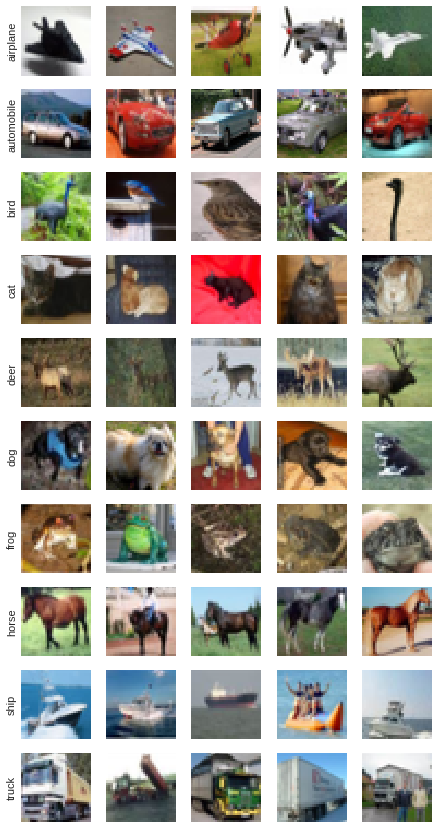

In [5]:
plt.figure(figsize=(15,15))
for class_index in range(10):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    if example_index == 0:
      plt.ylabel(class_names[class_index], rotation=90)
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()

### Definition for Simple Holdout validation

In [0]:
def holdout_val(data,index):
  t_data = data[:index]
  val_data = data[index:]
  return t_data,val_data

### Preprocessing data

#### Shuffling the training dataset

Images before shuffling


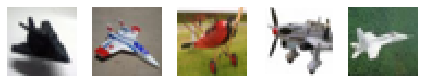

Images after shuffling


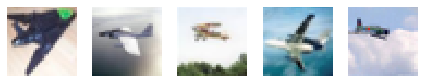

In [7]:
# Shuffling
index_shuffled = np.random.permutation(50000)
train_images_shuffled = train_images_original[index_shuffled]
train_labels_shuffled = train_labels_original[index_shuffled]

#Displaying few images before shuffling
print("Images before shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_original)):
  label = train_labels_original[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_original[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

# Displaying images after shuffling for same indices
print("Images after shuffling")
table = [[] for _ in range(10)]
for i in range(len(train_images_shuffled)):
  label = train_labels_shuffled[i, 0]
  table[label].append(i)
  
plt.figure(figsize=(15,15))
for class_index in range(1):
  for example_index in range(5):
    plt.subplot(10, 10, class_index * 10 + example_index + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_shuffled[table[class_index][example_index]], cmap=plt.cm.binary)
plt.show()  

#### Splitting the original training data into training and validation data sets

In [8]:
# Getting the training the training and validation datasets
train_images, val_images = holdout_val(train_images_shuffled,40000)
train_labels,val_labels = holdout_val(train_labels_shuffled,40000)

train_images.shape,val_images.shape,train_labels.shape,val_labels.shape

((40000, 32, 32, 3), (10000, 32, 32, 3), (40000, 1), (10000, 1))

#### Flattening and reshaping of images

In [9]:
train_labels = keras.utils.to_categorical(train_labels,10) # Since we have 10 classes
val_labels =keras.utils.to_categorical(val_labels,10)
test_labels = keras.utils.to_categorical(test_labels_original,10)

train_images = train_images.astype('float32')/255
val_images = val_images.astype('float32')/255
test_images = test_images_original.astype('float32')/255

train_images.shape, val_images.shape, test_images.shape, train_labels.shape, val_labels.shape, test_labels.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

### Building the model

In [10]:
batch_size = 128
num_epochs = 100


model = Sequential()

# Layer 1
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=train_images.shape[1:]))

#Layer2
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

#Layer 3
model.add(Conv2D(128, (3, 3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#Dense layers
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation ='softmax'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dens

### Running the model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr = 0.0005),
              metrics=['accuracy'])

metrics = model.fit(train_images, train_labels,
              batch_size = batch_size,
              epochs= num_epochs,
              validation_data=(val_images, val_labels))

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 12s 311us/step - loss: 1.7902 - acc: 0.3546 - val_loss: 1.5094 - val_acc: 0.4727
Epoch 2/100
40000/40000 [==============================] - 7s 181us/step - loss: 1.4310 - acc: 0.4864 - val_loss: 1.5315 - val_acc: 0.4437
Epoch 3/100
40000/40000 [==============================] - 7s 182us/step - loss: 1.2457 - acc: 0.5623 - val_loss: 1.2267 - val_acc: 0.5632
Epoch 4/100
40000/40000 [==============================] - 7s 183us/step - loss: 1.1033 - acc: 0.6148 - val_loss: 1.0743 - val_acc: 0.6203
Epoch 5/100
40000/40000 [==============================] - 7s 182us/step - loss: 0.9917 - acc: 0.6569 - val_loss: 1.1143 - val_acc: 0.6191
Epoch 6/100
40000/40000 [==============================] - 7s 181us/step - loss: 0.8990 - acc: 0.6894 - val_loss: 0.9535 - val_acc: 0.6748
Epoch 7/100
40000/40000 [==============================] - 7s 182us

### Displaying the Training and Validation Accuracy

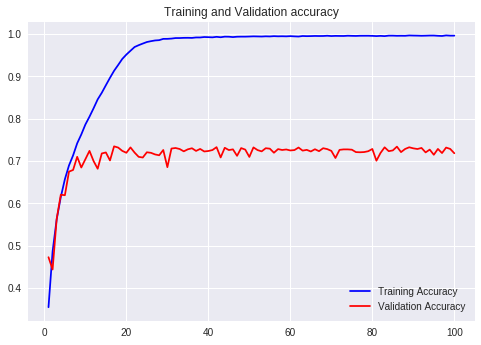

In [12]:
train_acc = metrics.history['acc']
val_acc = metrics.history['val_acc']


epochs = range(1, len(train_acc) + 1)


plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


### Evaluating on the test data

In [13]:
metrics_test = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss:', metrics_test[0])
print('Test accuracy:', metrics_test[1])

10000/10000 [==============================] - 1s 120us/step
Test loss: 2.9647406081199645
Test accuracy: 0.7088
